<a href="https://colab.research.google.com/github/Ivanas02/Modulo_Mineria_Datos/blob/main/TEyMD_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEyMD P4**

- **Jesús Iván Hernández Rivera**

En primera instancia se realizó la carga de la información para poder tener una visualización previa de los datos proporcionados y así poder continuar con el análisis de información.

In [ ]:
# Importamos las librerias necesarias
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
# Cargamos la información inicial
data = pd.read_csv('Big5raw.csv')
data.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53.0,1.0,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46.0,1.0,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14.0,2.0,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19.0,2.0,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25.0,2.0,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [ ]:
# Guardamos la cantidad de datos para identificar los que se van eliminando
d1 = len(data)

## *Limpieza de datos*

Gracias al *'codebook'* proporcionado podemos notar que todos aquellos campos que toman el valor **0** hacen alusión a que dicha respuesta no fue contestada por el usuario, así que no aporta valor dentro de nuestros análisis, por lo que procederemos a eliminar todos estos.

In [ ]:
# Eliminamos aquellas filas que toman un 0 dentro de los campos
data = data[data != 0].dropna()

# Obtenemos la cantidad de registros que se eliminaron
aux = len(data)
aux1 = d1 - aux
print(f'Se eliminaron {aux1} registros')

Se eliminaron 352 registros


Otra de las selecciones que tenemos que hacer es con respecto a la edad que tiene cada uno de los encuestados, seleccionamos todos aquellos que son tienen 66 años o menos.

In [ ]:
# Eliminamos aquellas filas en donde el encuestado es mayor a 66 años
data = data[data['age'] <= 66]

# Identificamos la cantidad de registros que se eliminaron
aux1 = len(data)
aux = aux - aux1
print(f'Se eliminaron {aux} registros')

Se eliminaron 181 registros


Para la siguiente parte fue necesario extraer la información correspondiente al *ISO country code*.

In [ ]:
# Cargamos la ISO
df = pd.read_csv('ISO_cc.csv', encoding='ISO-8859-1')
df.head()

,CODE,Country Name
0,AF,Afghanistan
1,AX,Aland Islands
2,AL,Albania
3,DZ,Algeria
4,AS,American Samoa


Lo que sigue es realizar un cruce entre la información de la encuesta de personalidad con la tabla ISO, esto a modo de validar que el código asociado al país del que proviene el encuestado sea válido, dejando fuera aquellos que no coinciden.

In [ ]:
# Realizamos el cruce
data_join = data.merge(df, left_on='country', right_on='CODE', how='inner')
data_join.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O3,O4,O5,O6,O7,O8,O9,O10,CODE,Country Name
0,3.0,53.0,1.0,1.0,1.0,1,US,4.0,2.0,5.0,...,3.0,1.0,5.0,1.0,4.0,2.0,5.0,5.0,US,United States
1,13.0,46.0,1.0,2.0,1.0,1,US,2.0,2.0,3.0,...,3.0,3.0,2.0,3.0,3.0,1.0,3.0,2.0,US,United States
2,11.0,25.0,2.0,2.0,1.0,2,US,3.0,1.0,3.0,...,1.0,1.0,3.0,1.0,3.0,1.0,5.0,3.0,US,United States
3,13.0,31.0,1.0,2.0,1.0,2,US,1.0,5.0,2.0,...,1.0,3.0,3.0,5.0,5.0,4.0,5.0,3.0,US,United States
4,5.0,20.0,1.0,2.0,1.0,5,US,5.0,1.0,5.0,...,5.0,1.0,4.0,1.0,4.0,3.0,3.0,4.0,US,United States


In [ ]:
# Identificamos la cantidad de valores que fueron eliminados
aux = len(data_join)
aux1 = aux1 - aux
print(f'Se eliminaron {aux1} registros')

Se eliminaron 420 registros


Como siguiente paso, tenemos que eliminar aquellos valores faltantes que se encuentran dentro de las variables demográficas, es decir, dentro de las columnas *race,	age,	engnat,	gender,	hand,	source y country.*

In [ ]:
# Variables
variables = ['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country']

# Eliminamos los valores faltantes
data_join = data_join.dropna(subset=variables)

In [ ]:
# Identificamos la cantidad de valores eliminados
aux1 = len(data_join)
aux = aux - aux1
print(f'Se eliminaron {aux} registros')

Se eliminaron 0 registros


Por último, observamos cuantos valores se eliminaron desde la carga de datos hasta el último paso.

In [ ]:
b = d1 - len(data_join)
print(f'Se eliminaron en TOTAL {b} registros')

Se eliminaron en TOTAL 953 registros


***NOTA: La selección de las 5 variables representativas se realiza dentro de la estadística descriptiva***

## *PCA*

Para esta parte, calcularemos el PCA para la totalidad de columnas de nuestra base de datos.

In [ ]:
# Selección de datos
df = data_join[data.columns]
features = df.select_dtypes(include=[float, int]).columns

# Normalización
norm = StandardScaler()
df_norm = norm.fit_transform(df[features])

# PCA
pca = PCA(n_components=None)
pca_res = pca.fit_transform(df_norm)

# Visualizar la varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")

Varianza explicada por cada componente: [0.14506058 0.08320924 0.06807244 0.06469688 0.04971553 0.03235003
 0.02514295 0.0224003  0.02047747 0.01839911 0.01795742 0.0171245
 0.01637592 0.01612136 0.01554993 0.01535083 0.01521226 0.0148479
 0.01415277 0.0134046  0.01295982 0.01276542 0.01236056 0.01196021
 0.01186442 0.01168036 0.01121213 0.01096326 0.01054729 0.01028116
 0.01022544 0.00986796 0.00949771 0.00935668 0.00930577 0.0090739
 0.00885851 0.00875827 0.00865787 0.00842422 0.00796249 0.0078954
 0.00772934 0.00745644 0.00741838 0.0072009  0.00704991 0.0067761
 0.00650902 0.00645938 0.00616106 0.00611811 0.00578607 0.0057643
 0.00555873 0.00391141]


In [ ]:
# Visualizar la varianza acumulada
print(f"Varianza explicada acumulada: {np.cumsum(explained_variance)}")

Varianza explicada acumulada: [0.14506058 0.22826981 0.29634225 0.36103913 0.41075466 0.44310469
 0.46824764 0.49064795 0.51112542 0.52952453 0.54748195 0.56460645
 0.58098237 0.59710373 0.61265366 0.62800449 0.64321675 0.65806465
 0.67221742 0.68562202 0.69858185 0.71134726 0.72370783 0.73566803
 0.74753245 0.75921281 0.77042494 0.7813882  0.79193549 0.80221665
 0.81244209 0.82231004 0.83180776 0.84116444 0.85047021 0.8595441
 0.86840261 0.87716088 0.88581874 0.89424296 0.90220545 0.91010085
 0.91783019 0.92528663 0.932705   0.9399059  0.94695581 0.95373192
 0.96024094 0.96670032 0.97286138 0.97897948 0.98476556 0.99052985
 0.99608859 1.        ]


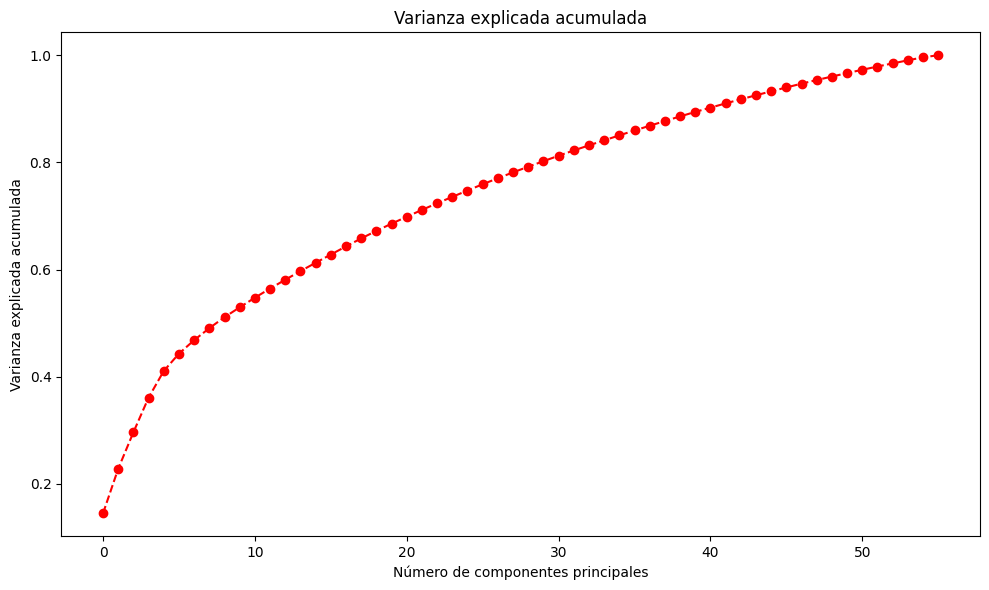

In [ ]:
# Grafico de la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='r')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


En resumen, tenemos que la primera componente explica aproximadamente el *14.5%* de la varianza total, es la que tiene mayor poder explicativo. Tambien podemos observar que cerca del *41%* de la varianza acumulada se explica dentro de los primeros cinco componentes, lo cual, tomando al rededor de 20 a 30 componentes puede abarcar entre el *80%* de la varianza total, dado que las últimas componentes tienen un peso menor conrespecto a las ya observadas, reduciendo la dimensionalidad del universo observado.

## *Clustering*

A continuación, se realiza el análisis de clustering para 2, 3, 4 y 5 clusteres. Con respecto a la conclusión anterior, identificamos que las más representativas son las primeras 30 variables, dado que explican alrededor del 80% de la varianza acumulada, entonces realizaremos el clustering con estas variables

In [ ]:
# Definir el número de clusters a probar
n_clusters = [2, 3, 4, 5]
cluster_labels = {}

# Realizar K-Means para cada número de clusters
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_res[:,:30])
    cluster_labels[k] = labels

    # Número de datos en cada cluster
    unique, counts = np.unique(labels, return_counts=True)
    cluster_counts = dict(zip(unique, counts))

    print(f"Cantidad de datos para {k} clusters: {sorted(cluster_counts.items(), key=lambda item: item[1], reverse=True)}")
    print(f"Total de datos para {k} clusters: {sum(cluster_counts.values())}")
    print("")

Cantidad de datos para 2 clusters: [(1, 9444), (0, 9322)]
Total de datos para 2 clusters: 18766

Cantidad de datos para 3 clusters: [(2, 6608), (1, 6341), (0, 5817)]
Total de datos para 3 clusters: 18766

Cantidad de datos para 4 clusters: [(2, 5905), (0, 4892), (1, 4605), (3, 3364)]
Total de datos para 4 clusters: 18766

Cantidad de datos para 5 clusters: [(0, 4263), (2, 4230), (1, 4010), (3, 3583), (4, 2680)]
Total de datos para 5 clusters: 18766



El **método del codo**, es una técnica que ayuda a determinar el número óptimo de clústers al realizar una clasificación de un conjunto de datos. Se basa en las distancias intra-cluster, y se interpreta de la siguiente manera:
- A mayor número de clústers, la varianza intra-cluster tiende a disminuir.
- Menor distancia intra-cluster, mejor, ya que significa que los clústers son más compactos.


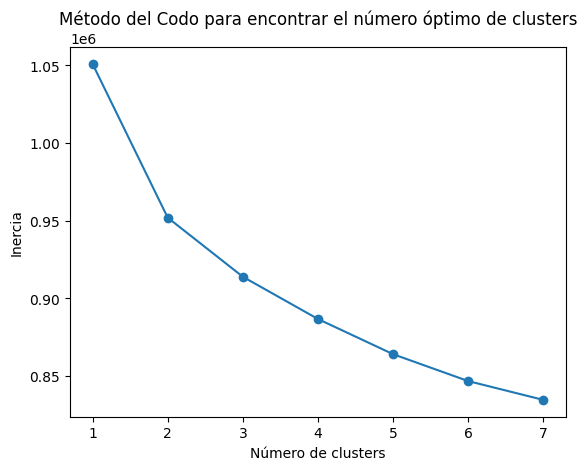

In [ ]:
# Elige el número óptimo de clusters usando el codo de la varianza
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_norm)
    inertia.append(kmeans.inertia_)

# Método del codo gráficamente
plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

Utilizando el método del Codo, podemos concluir que utilizar $k=2$ o $k=3$ es una buena opción para generar clusters, ya que a partir de estos números, la reducción en la inercia se vuelve menos significativa. Esto indica que agregar más clústeres no aporta información adicional relevante para la segmentación de los datos.

## *Estadística descriptiva*

Con base an codebook proporcionado, tenemos una vista más clara para poder interpretar los valores de cada una de las columnas de nuestra base de datos, en este caso son datos relacionados a la personalidad de cada una de las personas que respondieron el test. Teniendo la siguiente representación para cadea una de las variables:

|Column name| Representation|
|-|-|
|E1	|I am the life of the party.
|E2	|I don't talk a lot.
|E3	|I feel comfortable around people.
|E4	|I keep in the background.
|E5	|I start conversations.
|E6	|I have little to say.
|E7	|I talk to a lot of different people at parties.
|E8	|I don't like to draw attention to myself.
|E9	|I don't mind being the center of attention.
|E10	|I am quiet around strangers.
|N1	|I get stressed out easily.
|N2	|I am relaxed most of the time.
|N3	|I worry about things.
|N4	|I seldom feel blue.
|N5	|I am easily disturbed.
|N6	|I get upset easily.
|N7	|I change my mood a lot.
|N8	|I have frequent mood swings.
|N9	|I get irritated easily.
|N10	|I often feel blue.
|A1	|I feel little concern for others.
|A2	|I am interested in people.
|A3	|I insult people.
|A4	|I sympathize with others' feelings.
|A5	|I am not interested in other people's problems.
|A6	|I have a soft heart.
|A7	|I am not really interested in others.
|A8	|I take time out for others.
|A9	|I feel others' emotions.
|A10	|I make people feel at ease.
|C1	|I am always prepared.
|C2	|I leave my belongings around.
|C3	|I pay attention to details.
|C4	|I make a mess of things.
|C5	|I get chores done right away.
|C6	|I often forget to put things back in their proper place.
|C7	|I like order.
|C8	|I shirk my duties.
|C9	|I follow a schedule.
|C10	|I am exacting in my work.
|O1	|I have a rich vocabulary.
|O2	|I have difficulty understanding abstract ideas.
|O3	|I have a vivid imagination.
|O4	|I am not interested in abstract ideas.
|O5	|I have excellent ideas.
|O6	|I do not have a good imagination.
|O7	|I am quick to understand things.
|O8	|I use difficult words.
|O9	|I spend time reflecting on things.
|O10	|I am full of ideas.


La representación de cada una de las preguntas antes descritas se asemejan a pruebas psicométricas que en ocasiones se realizan a prospectos para entrar a laborar en una empresa/institución.

Se ocuparán las siguientes estadísticas a cada uno de los campos:

- *Media:* Valor promedio de un conjunto de datos numéricos.
- *Mínimo*: Es el valor más pequeño que toma una función/campo.
- *Máximo:* Es el valor más grande que toma una función/campo.
- *Moda:* Es el número que aparece más veces en un conjunto de datos
- *Media redondeada*: Valor promedio de los valores redondeado a cero decimales, esto se realizó con el fin de identificar en que punto se encuentra en promedio la población.
- *Desviación estándar:* Medida que indica qué tan dispersos están los datos en relación a la media
- *Conteo/Frecuencia:* Cantidad de valores no nulos dentro de un campo.

In [ ]:
# Eliminamos la variable categorica
df_est = df.drop('country',axis=1)
# Aplicamos la estadística descriptiva
df_est = pd.DataFrame({
    'Media': df_est.mean(),
    'Mínimo': df_est.min(),
    'Máximo': df_est.max(),
    'Moda': df_est.mode().iloc[0],
    'Media_redondeada': df_est.mean().round(0),
    'Desviación Estándar': df_est.std(),
    'Conteo': df_est.count()
})
df_est.head()

,Media,Mínimo,Máximo,Moda,Media_redondeada,Desviación Estándar,Conteo
race,5.348343,1.0,13.0,3.0,5.0,4.000452,18766
age,25.939305,13.0,66.0,18.0,26.0,11.051742,18766
engnat,1.369551,1.0,2.0,1.0,1.0,0.482696,18766
gender,1.625386,1.0,99.0,2.0,2.0,0.887143,18766
hand,1.136737,1.0,20.0,1.0,1.0,0.432193,18766


### *Selección de variables representativas*

Despúes de realizar la estadística descriptiva y de observar los posibles valores que pueden tomar los distintos campos, continuamos a realizar conclusiones de las variables más representativas según nuestro criterio.

Identificamos los siguientes campos como los que definen mejor la personalidad dentro de cada una de las secciones del test:

- **E1:** Representa que tan sociable  es el encuestado y la capacidad de transmitir su energía.
- **N1:** Indica que tan susceptible es a experimentar sensaciones negativas.
- **O3:** Refleja la creatividad para confrontar su vida diaria.
- **A2:** Señala cuanta empatía suele tener hacía los demás.
- **C1:** Representa el nivel de organización que tiene.

In [ ]:
df_est.loc[['E1', 'N1', 'O3', 'A2', 'C1']]

,Media,Mínimo,Máximo,Moda,Media_redondeada,Desviación Estándar,Conteo
E1,2.632047,1.0,5.0,3.0,3.0,1.231358,18766
N1,3.264628,1.0,5.0,4.0,3.0,1.308275,18766
O3,4.129223,1.0,5.0,5.0,4.0,1.005703,18766
A2,3.927742,1.0,5.0,5.0,4.0,1.077345,18766
C1,3.317596,1.0,5.0,4.0,3.0,1.099067,18766


Con las modas de 4 y 5 en algunas preguntas, parece haber una ligera inclinación hacia respuestas más positivas, es decir, se acoplan a su personalidad.

*Conclusiones por variables observadas:*
- **E1:** La mayoría de los encuestados no se siente identificado en esta característica, normalmente no son el alma de la fiesta pero tampoco son tímidos en este aspecto, en promedio la respuesta se encuentra en este valor.
- **N1:** En esta característica, la mayoría de encuestados da una inclinación positiva, lo que representa que reiteradamente se encuentran estresados (no siempre). El valor promedio que toma esta variable es de *3 (neutral)*.
- **O3:** Dentro de esta característica, la tendencia se sigue manteniendo positiva, lo cual representa que la mayoría de las personas reflejan su creatividad intelectual en su vida diaria. Al igual que la medida anterior, el promedio incremento a *4*, indicando que en promedio, los encuestados se encuentran identificados pero no al 100%.
- **A2:** La tendencia de esta característica se mantiene positiva, lo cual representa que la mayoría de las personas son empaticos con las personas que los rodean, inclusive si al momento de la interacción son desconocidos para ellos. Al igual que la medida anterior, el promedio se mantuvo en *4*, indicando que en promedio, los encuestados se encuentran identificados pero no al 100%.
- **C1:** En este caso, tambien se presenta una tendencia positiva dentro de los encuestados, pero no tanto como las dos características anteriores, la mayoría de las personas mantienen un autocontrol y una organización buena dentro de su día a día. Así como en la moda, el promedio tambien bajo a *3*, lo que nos indica que un encuestado promedio es neutral a esta característica.

### *Visualización de datos*

- Frecuencia por género de encuestados

Un gráfico de barras nos sirve para identificar la frecuencia asociada a cada uno de los distintos valores que toma un campo dentro de una base de datos.

En este caso visualizaremos la distribución por género de los que se encuentran dentro de la base.

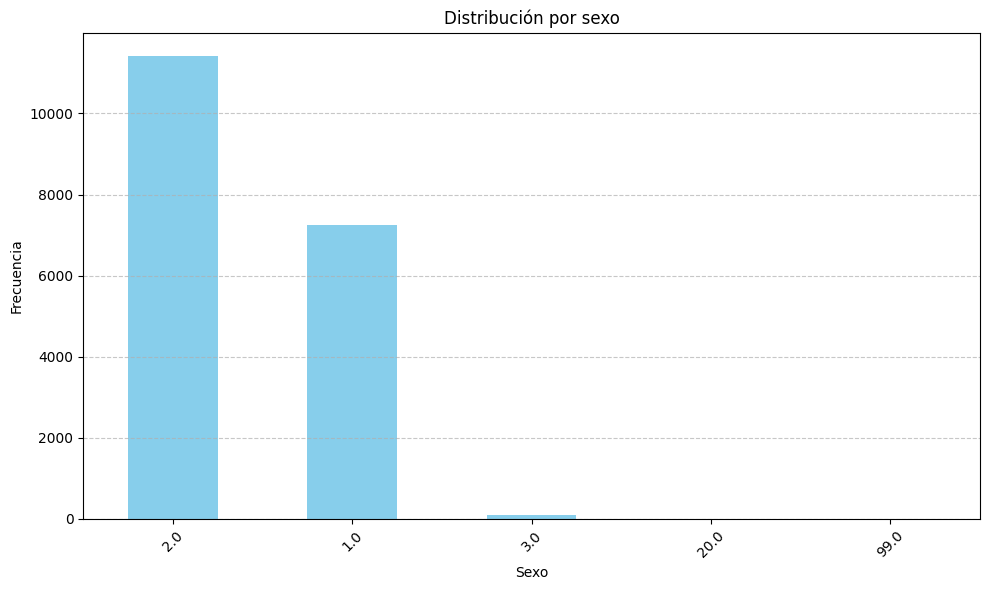

In [ ]:
# Contar las frecuencias de género del usuario/encuestado
counts = df['gender'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribución por sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Normalmente en una encuesta se secciona el género de los participantes en 3 *masculino, femenino y otro*, para fines prácticos tomaremos *1: masculino*, *2: femenino* y *3: otro*, dentro del campo 3 agruparemos todos aquellos valores que son diferentes de 1 o 2.

In [ ]:
df['gender'] = df['gender'].apply(lambda x: x if x in [1, 2] else 3)

<ipython-input-240-17f4d8fb7617>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].apply(lambda x: x if x in [1, 2] else 3)


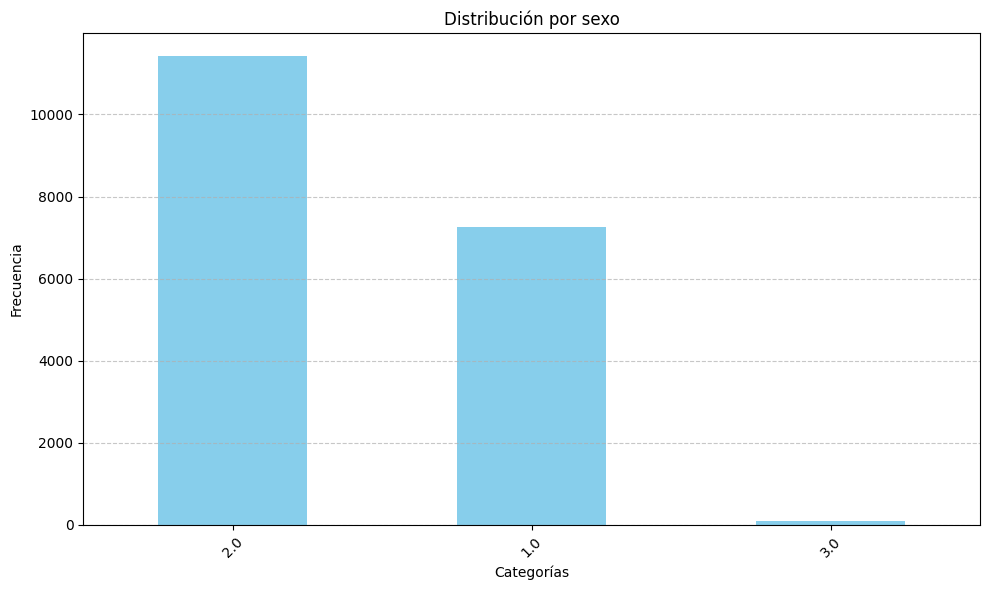

In [ ]:
# Contar las frecuencias por sexo de los encuestados
counts = df['gender'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribución por sexo')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

De la visualización anterior, concluimos que existe una gran diferencia entre el género de encuestados, representando un mayor número de encuestadas femeninas. En caso de querer modelar la personalidad que tienen los futuros usuarios del test, puede representar un sesgo para aquellos que son del sexo masculino, dado que esta diferencia puede modelar mejor a las mujeres que presenten este test.

- Top 10 países con más encuestas realizadas.



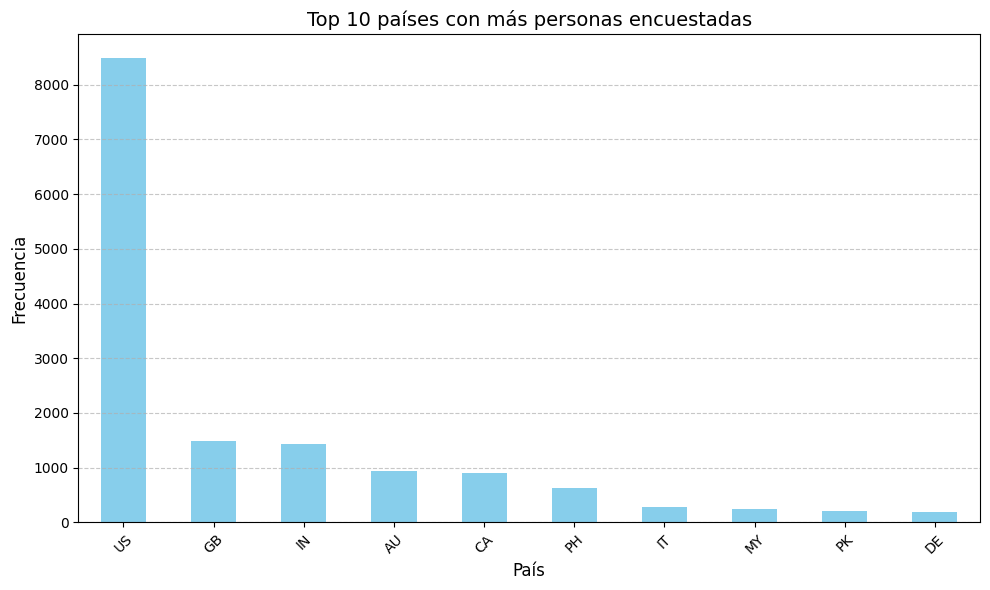

In [ ]:
# Supongamos que ya tienes el top 10 de países
top_country = df['country'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
top_country.plot(kind='bar', color='skyblue')
plt.title('Top 10 países con más personas encuestadas', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

De la visualización anterior, concluimos que existe una gran diferencia en cuestión al país desde los encuestados realizaron el test, mostrando una gran abundancia para el país con código *'US' (United States)*.

### *PCA para las variables representativas*

In [ ]:
# Normalización
norm = StandardScaler()
df_norm = norm.fit_transform(df[['E1', 'N1', 'O3', 'A2', 'C1']])

# PCA
pca = PCA(n_components=None)
pca_res = pca.fit_transform(df_norm)

# Visualizar la varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")

Varianza explicada por cada componente: [0.273019   0.21532448 0.18752543 0.18082518 0.14330591]


In [ ]:
# Visualizar la varianza acumulada
print(f"Varianza explicada acumulada: {np.cumsum(explained_variance)}")

Varianza explicada acumulada: [0.273019   0.48834348 0.67586891 0.85669409 1.        ]


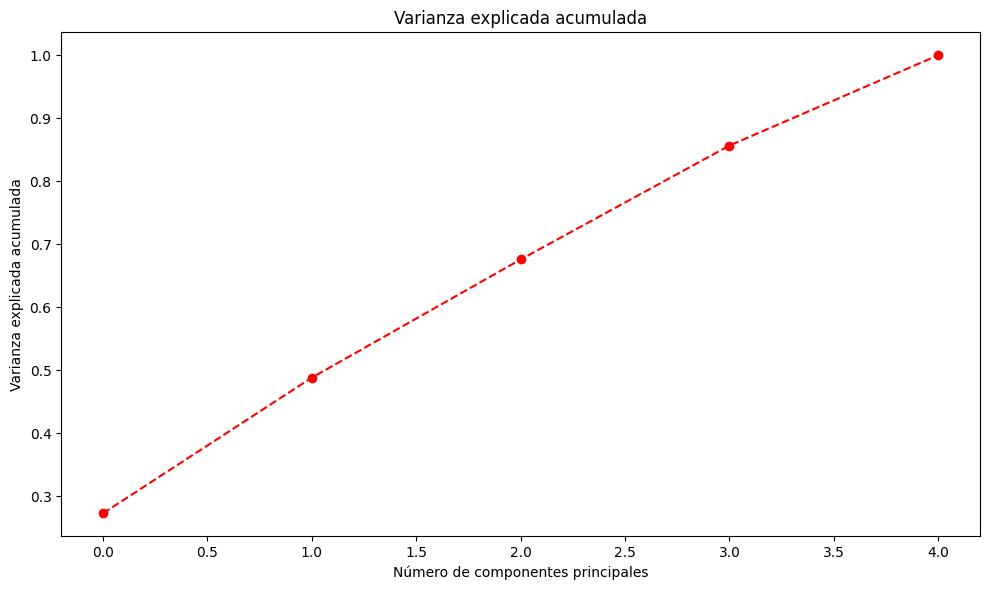

In [ ]:
# Grafico de la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='r')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

En resumen, tenemos que la primera componente explica aproximadamente el *27%* de la varianza total, es la que tiene mayor poder explicativo. Tambien podemos observar que cerca del *86%* de la varianza acumulada se explica dentro de los primeros cuatro componentes.

### *Clustering para las variables representativas*

Se realizará el mismo ejercicio, pero ahora teniendo en cuenta las variables mas representativas escogidas anteriormente y con la conclusion anterior, sabemos que los primeros 4 componentes explican más del 85% de la varianza acumulada.

In [ ]:
# Definir el número de clusters a probar
n_clusters = [2, 3, 4, 5]
cluster_labels = {}

# Realizar K-Means para cada número de clusters
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_res[:,:4])
    cluster_labels[k] = labels

    # Número de datos en cada cluster
    unique, counts = np.unique(labels, return_counts=True)
    cluster_counts = dict(zip(unique, counts))

    print(f"Cantidad de datos para {k} clusters: {sorted(cluster_counts.items(), key=lambda item: item[1], reverse=True)}")
    print(f"Total de datos para {k} clusters: {sum(cluster_counts.values())}")
    print("")

Cantidad de datos para 2 clusters: [(0, 10240), (1, 8526)]
Total de datos para 2 clusters: 18766

Cantidad de datos para 3 clusters: [(0, 6701), (2, 6429), (1, 5636)]
Total de datos para 3 clusters: 18766

Cantidad de datos para 4 clusters: [(0, 5594), (2, 5380), (1, 4260), (3, 3532)]
Total de datos para 4 clusters: 18766

Cantidad de datos para 5 clusters: [(0, 4493), (2, 4221), (4, 3464), (1, 3365), (3, 3223)]
Total de datos para 5 clusters: 18766



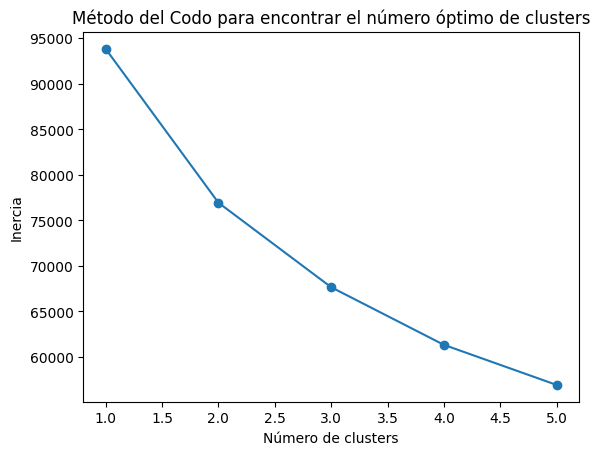

In [ ]:
# Elige el número óptimo de clusters usando el codo de la varianza
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_norm)
    inertia.append(kmeans.inertia_)

# Método del codo gráficamente
plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

Utilizando el método del Codo, podemos concluir que utilizar $k=2$ o $k=3$ es una buena opción para generar clusters, ya que a partir de estos números, la reducción en la inercia se vuelve menos significativa. Esto indica que agregar más clústeres no aporta información adicional relevante para la segmentación de los datos.